> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [No_Show_Appointment]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

#The dataset I have chosen is "Medical Appontment No Shows". I will be analyizing the data of multiple factors to determine which ones appear to have a direct correlation to a "no show".  The columns for this dataset include: 

#01 - PatientId
-Identification of a patient
#02 - AppointmentID
-Identification of each appointment
#03 - Gender
-Male or Female 
#04 - AppointmentDay
-The day of the actual appointment, when they have to visit the doctor.
#05 - ScheduledDay
-The day someone called or registered the appointment, this is before the appointment.
#06 - Age
-How old is the patient.
#07 - Neighbourhood
-Where the appointment takes place.
#08 - Scholarship
-True of False . Seems to have a broad meaning. 
#09 - Hypertension
-True or False
#10 - Diabetes
-True or False
#Alcoholism
-True or False
#Handcap
-True or False
#SMS_received
-1 or more messages sent to the patient.
#No-show
-True or False. 


### Question(s) for Analysis
#What factors are most associated with patients who no-show their appointments?
 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/workspace/Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
#had to make some minor spelling corrections to the file itself to make it easier to remember the column names. 
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations initially. This does not have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, trim the excess and organize your steps so that you have a flowing, cohesive report.

In [2]:
print(df.head())
#I loaded the data to see the first 5 rows of what I have loaded and what I'm working with. 
#Getting an idea of the scope of this data set and determining how best to extract and organize this data.

      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age       Neighborhood  Scholarship  Hypertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0      

In [3]:
print(df.shape)
#This function allows me to see that I have 110,527 roas and 14 columns

(110527, 14)


In [4]:
print(df.info())
#This gives me lots of information, such as the names of the thirteen columns, 
#whether or not there are any null counts and the data type and counts of those, 
#as well as the size of the file itself

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighborhood    110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hypertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB
None


In [5]:
df.describe()
#Here you can see total counts, standard deviation,and other information that's helpful for looking at data. 

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
mean = df['PatientId'].mean()
df['PatientId'] = df['PatientId'].fillna(mean)

In [7]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
110522    False
110523    False
110524    False
110525    False
110526    False
Length: 110527, dtype: bool

In [8]:
sum(df.duplicated())
#I used the functions in 10,11,&12 to ensure that there were no duplicated appointment ID's 
#in the dataset to avoid any misinformation. 

0


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [9]:
#Data Types: ScheduledDat and AppointmentDay are stored as objects, but need to be stored as datetime types instead. 
#Age Groups: I want to seperate the age into groups to make them easier to combine with other variables later on. 
#Catagorical Variables: The Gender, Neighborhood, and No-show columns are stored as objects. I need to confirm if the columns
#the expected categorical values and think about converting them to a category data type of better memory usage and analysis.

In [10]:
columns_to_convert = ['ScheduledDay', 'AppointmentDay']
columns_to_category = ['Gender', 'Neighborhood', 'No-show']

for column in columns_to_convert:
    df[column] = pd.to_datetime(df[column])

for column in columns_to_category:
    df[column] = df[column].astype('category')

#Instead of using repetitive lines to convert each column into the needed data type, we can use a loop to iterate
#over the column names and change the data types

print(df.info())
#This command will allow me to make sure my desired changes took effect correctly. 
#You can see below that they have been changed and the size of the file was even reduced. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  category           
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighborhood    110527 non-null  category           
 7   Scholarship     110527 non-null  int64              
 8   Hypertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

In [29]:
#First I had to define the age groups I wanted
age_groups = [0, 18, 40, float('inf')]
age_labels = ['0-18', '19-40', '>40']

#Then I needed to create a new column based on these groups
df['Age Group'] = pd.cut(df['Age'], bins=age_groups, labels=age_labels, right=False)

#I wanted to see how many of each age group I had. 
age_group_counts = df['Age Group'].value_counts()

print("Count of each age group:")
print(age_group_counts)


Count of each age group:
>40      51245
19-40    31902
0-18     27379
Name: Age Group, dtype: int64


In [12]:
df_noshow = df[df["No-show"] == "Yes"]
df_noshow.head()
#I used this to help simplify the data to only show No-show appointments. 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
6,7.336882e+14,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes
11,7.542951e+12,5620163,M,2016-04-26 08:44:12+00:00,2016-04-29 00:00:00+00:00,29,NOVA PALESTINA,0,0,0,0,0,1,Yes
17,1.479497e+13,5633460,F,2016-04-28 09:28:57+00:00,2016-04-29 00:00:00+00:00,40,CONQUISTA,1,0,0,0,0,0,Yes
20,6.222575e+14,5626083,F,2016-04-27 07:51:14+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,0,0,Yes


In [13]:
df['No-show'].value_counts()
#This to get an idea of how many of the appointments were no-shows. 

No     88208
Yes    22319
Name: No-show, dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. Remember to utilize the visualizations that the pandas library already has available.



> **Tip**: Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### What 3 factors are most associated with a "No Show"?

In [14]:
#Here I will be looking at different columns to explore correlation between them and the amount of no-shows
#I will be looking at Gender, "variable groups"(Hypertension, Diabetes, SMS_text, etc.), Neighborhood, and Age Groups
#I will also look into Gender+Age Groups

In [15]:
value_counts=df.groupby("Neighborhood")['No-show'].value_counts()
filtered_counts = value_counts[value_counts > 300]
print(filtered_counts)
#First, I wanted to see if the Neighborhood had a strong correlation to "No-shows". 
#Without using tools I haven't learned yet, it would be hard to determine with this amount of data

Neighborhood    No-show
ANDORINHAS      No         1741
                Yes         521
BARRO VERMELHO  No          332
BELA VISTA      No         1523
                Yes         384
                           ... 
SÃO PEDRO       No         1933
                Yes         515
TABUAZEIRO      No         2559
                Yes         573
VILA RUBIM      No          710
Name: No-show, Length: 91, dtype: int64


Count of males and females for each no-show status:
No-show     No    Yes
Gender               
F        57246  14594
M        30962   7725


''

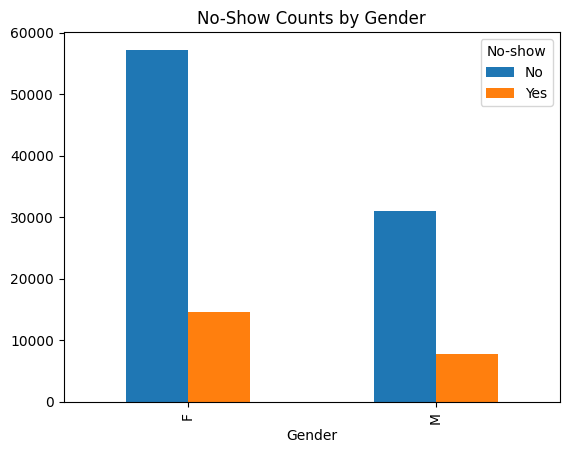

In [16]:
#I'm filtering the DataFrame for 'No-show' equal to 'Yes' or 'No'
no_show_df = df[df['No-show'].isin(['Yes', 'No'])]

#Calculating the count of males and females for each no-show status
gender_counts = no_show_df.groupby(['Gender', 'No-show']).size().unstack().fillna(0)

#and lastly print the count of males and females for each no-show status and use a graph for visualization


print("Count of males and females for each no-show status:")
print(gender_counts)

gender_counts.plot.bar()
plt.title('No-Show Counts by Gender')
;

No-show counts for Scholarship:
No     19741
Yes     2578
Name: Scholarship, dtype: int64

No-show counts for Hypertension:
No     18547
Yes     3772
Name: Hypertension, dtype: int64

No-show counts for Diabetes:
No     20889
Yes     1430
Name: Diabetes, dtype: int64

No-show counts for Alcoholism:
No     21642
Yes      677
Name: Alcoholism, dtype: int64

No-show counts for Handcap:
No     21912
Yes      366
Name: Handcap, dtype: int64



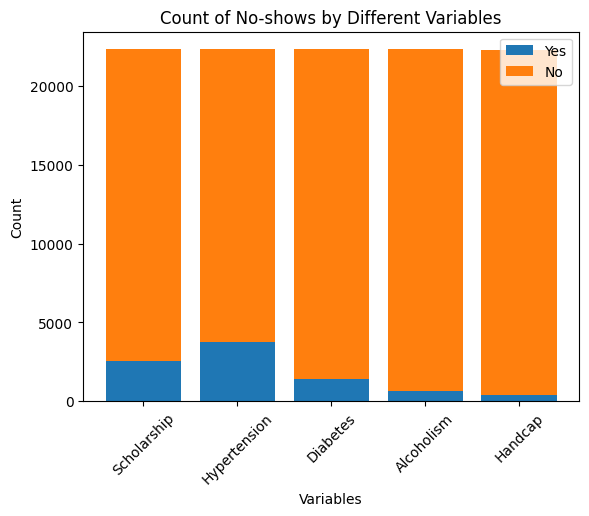

In [34]:
columns = ['Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handcap']
#I seperated each column out to show whether they "no-showed" their appointments
#Each column has already been filtered to having the pre-requisite "True" condition, i.e. has diabetes or hypertension
for column in columns:
    no_show_counts = df[df['No-show'] == 'Yes'][column].map({0: 'No', 1: 'Yes'}).value_counts()
    print(f"No-show counts for {column}:")
    print(no_show_counts)
    print()
#Also, "Yes" means that there were a "no-show"


#I had to get a little help from Udacity GPT on the chart. I knew what I wanted to display, but not exactly how to do it. 
#Created a figure and axes for the bar plot
fig, ax = plt.subplots()

#Created empty lists to store the values for each category
no_show_counts_yes = []
no_show_counts_no = []

#Looped through each column
for column in columns:
    #Counted the number of "Yes" and "No" values for no-shows in each column
    no_show_counts = df[df['No-show'] == 'Yes'][column].value_counts()
    
    # Appended the counts to the respective lists
    no_show_counts_yes.append(no_show_counts[1])
    no_show_counts_no.append(no_show_counts[0])

# Creating the x-axis positions for the bars
x = range(len(columns))

# Plotting the bars for "Yes" and "No" values
ax.bar(x, no_show_counts_yes, label='Yes')
ax.bar(x, no_show_counts_no, bottom=no_show_counts_yes, label='No')


ax.set_xlabel('Variables')
ax.set_ylabel('Count')
ax.set_title('Count of No-shows by Different Variables')
ax.set_xticks(x)
ax.set_xticklabels(columns, rotation=45)
ax.legend()
plt.show()

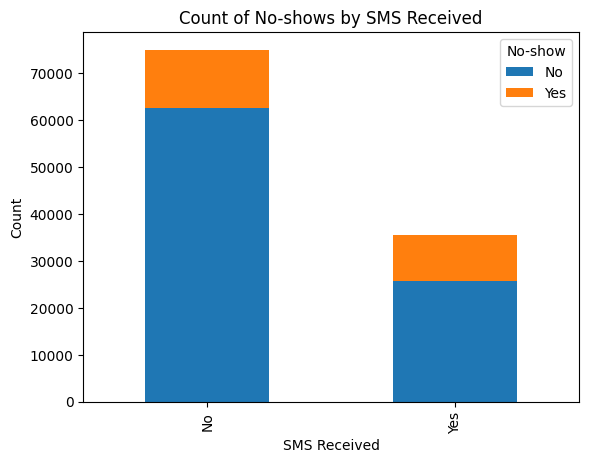

In [18]:
#Below I wanted to see how large of an effect an SMS notification had on the number of no-shows. 
# Mapped the values of "SMS_received" column to "Yes" or "No"
df['SMS_received'] = df['SMS_received'].map({0: 'No', 1: 'Yes'})

# Grouped the data by the "SMS_received" column and "No-show" column
sms_no_show_counts = df.groupby(['SMS_received', 'No-show']).size().unstack().fillna(0)

# Plotting the bar plot
sms_no_show_counts.plot(kind='bar', stacked=True)

plt.xlabel('SMS Received')
plt.ylabel('Count')
plt.title('Count of No-shows by SMS Received')

plt.show()

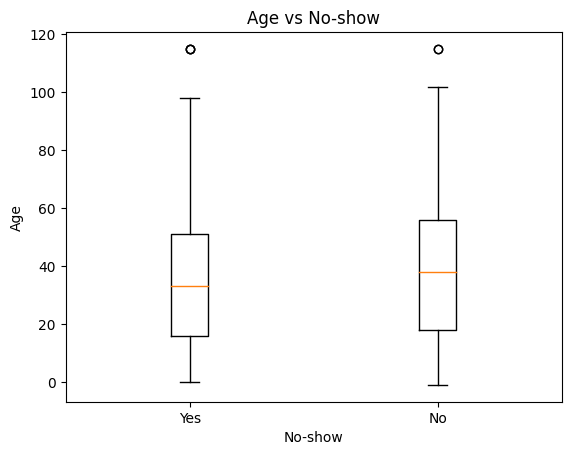

In [31]:
#I wanted to see the numbers for no-shows based on age range to understand if there was a correlation. 

# Filter the data for "No-show" equals "Yes"
yes_df = df[df['No-show'] == 'Yes']

# Filter the data for "No-show" equals "No"
no_df = df[df['No-show'] == 'No']

# Create a list of age values for each "No-show" status
age_data = [yes_df['Age'], no_df['Age']]

# Create the box plot
plt.boxplot(age_data, labels=['Yes', 'No'])

# Set the plot title and labels
plt.title('Age vs No-show')
plt.xlabel('No-show')
plt.ylabel('Age')

# Show the plot
plt.show()

Count of 'Yes' and 'No' for no-shows in each age group:
No-show       No   Yes
Age Group             
0-18       21382  5997
19-40      24478  7424
>40        42347  8898


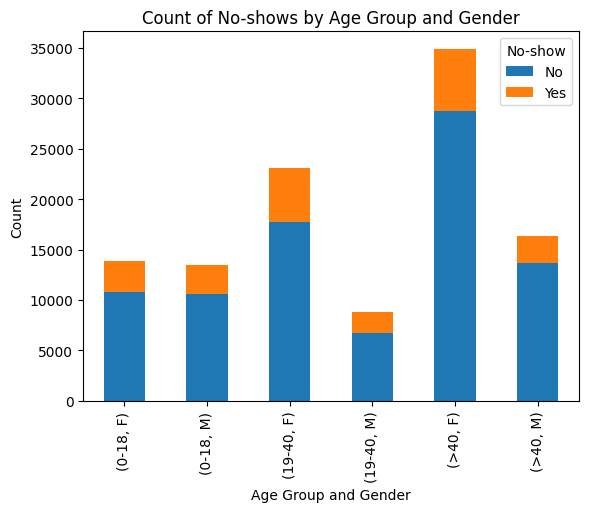

In [32]:
#To help visualize the data, I decided to break the Ages column further down to display gender as well. 

age_group_counts = df.groupby('Age Group')['No-show'].value_counts().unstack().fillna(0)

print("Count of 'Yes' and 'No' for no-shows in each age group:")
print(age_group_counts)
# Next, I wanted to further dive into the data by separating the age groups by gender. 
age_gender_counts = df.groupby(['Age Group', 'Gender'])['No-show'].value_counts().unstack().fillna(0)

# Plotting the stacked bar plot
age_gender_counts.plot(kind='bar', stacked=True)

plt.xlabel('Age Group and Gender')
plt.ylabel('Count')
plt.title('Count of No-shows by Age Group and Gender')
plt.show()

<a id='conclusions'></a>
## Conclusions


#In conclusion, we can see that there appears to be ceratin variables that are more likely to determine whether an appointment will be a no show or not. 

#1. The data shows, percentage wise, that there is not much of a difference between no-shows within gender. The data does show that more women go to the doctors, but when compared to percentage of no-shoes, they are roughly the same. 

#2 An SMS notification appears to have a slight effect on whether a person will show up or not to an appointment. 

#3 For age groups, there definitely shows to be a trend of people over the age of 40 "No-showing" their appointments more often than people in the other age gropus. 

#4 When the data is broken down into both age and gender, females over the age of 18 are shown to be more likely to "No-show". 

#Limitations: One of the limitations I found was being able to accurately plot the variables chart with another group such as Age Group or Gender. The chart does not seem to want to be as complex as I would need it to be to accurately display that information in an easy to read format. 



In [35]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] Writing 801021 bytes to Investigate_a_Dataset.html
